In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

In [2]:
##Exploratory Data Analysis (EDA):
# Load dataset
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
features = df.columns[1:]
features

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [7]:
X = df[features]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
y = df['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [9]:
#Checks: missing values 
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
#Checks: duplicates
df.duplicated().sum()

0

<Figure size 1400x800 with 0 Axes>

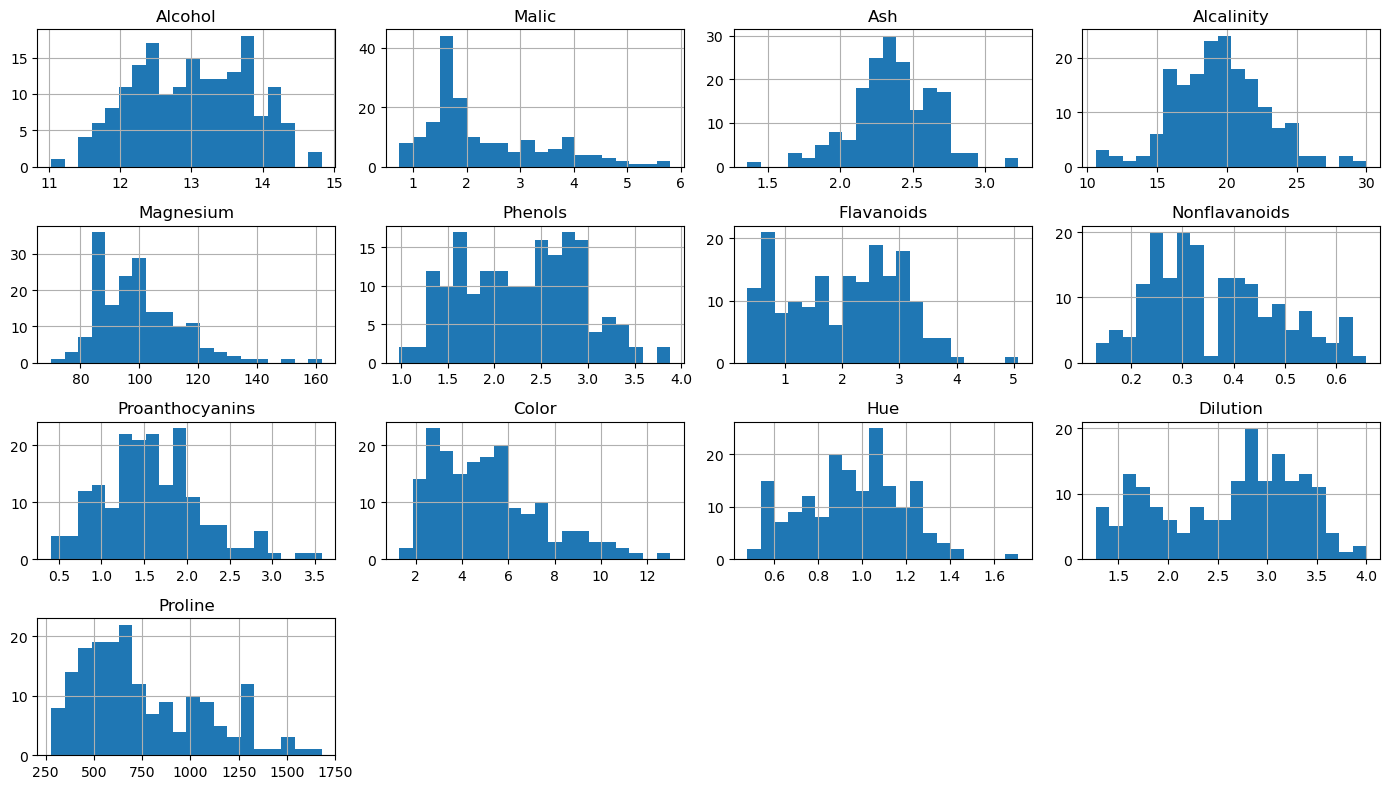

In [11]:
# Visualizations
# Histograms PLOT
plt.figure(figsize=(14,8))
X.hist(bins=20, figsize=(14,8))
plt.tight_layout()
plt.show()

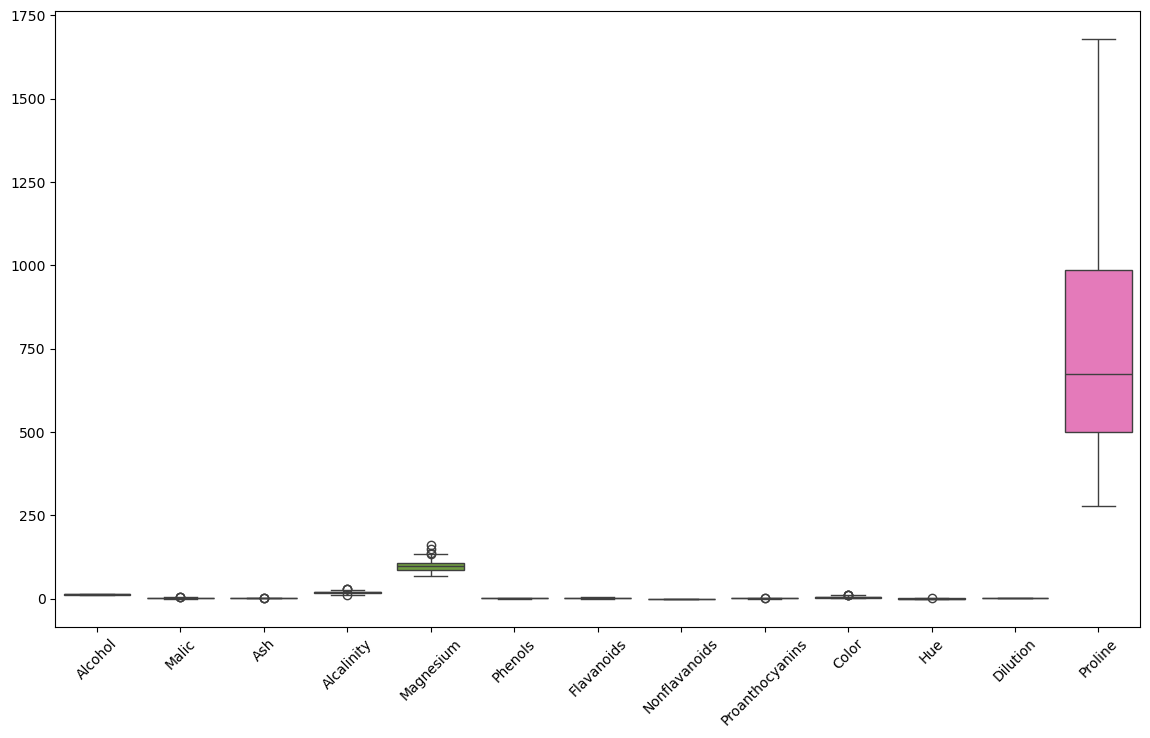

In [12]:
# Boxplots
plt.figure(figsize=(14,8))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

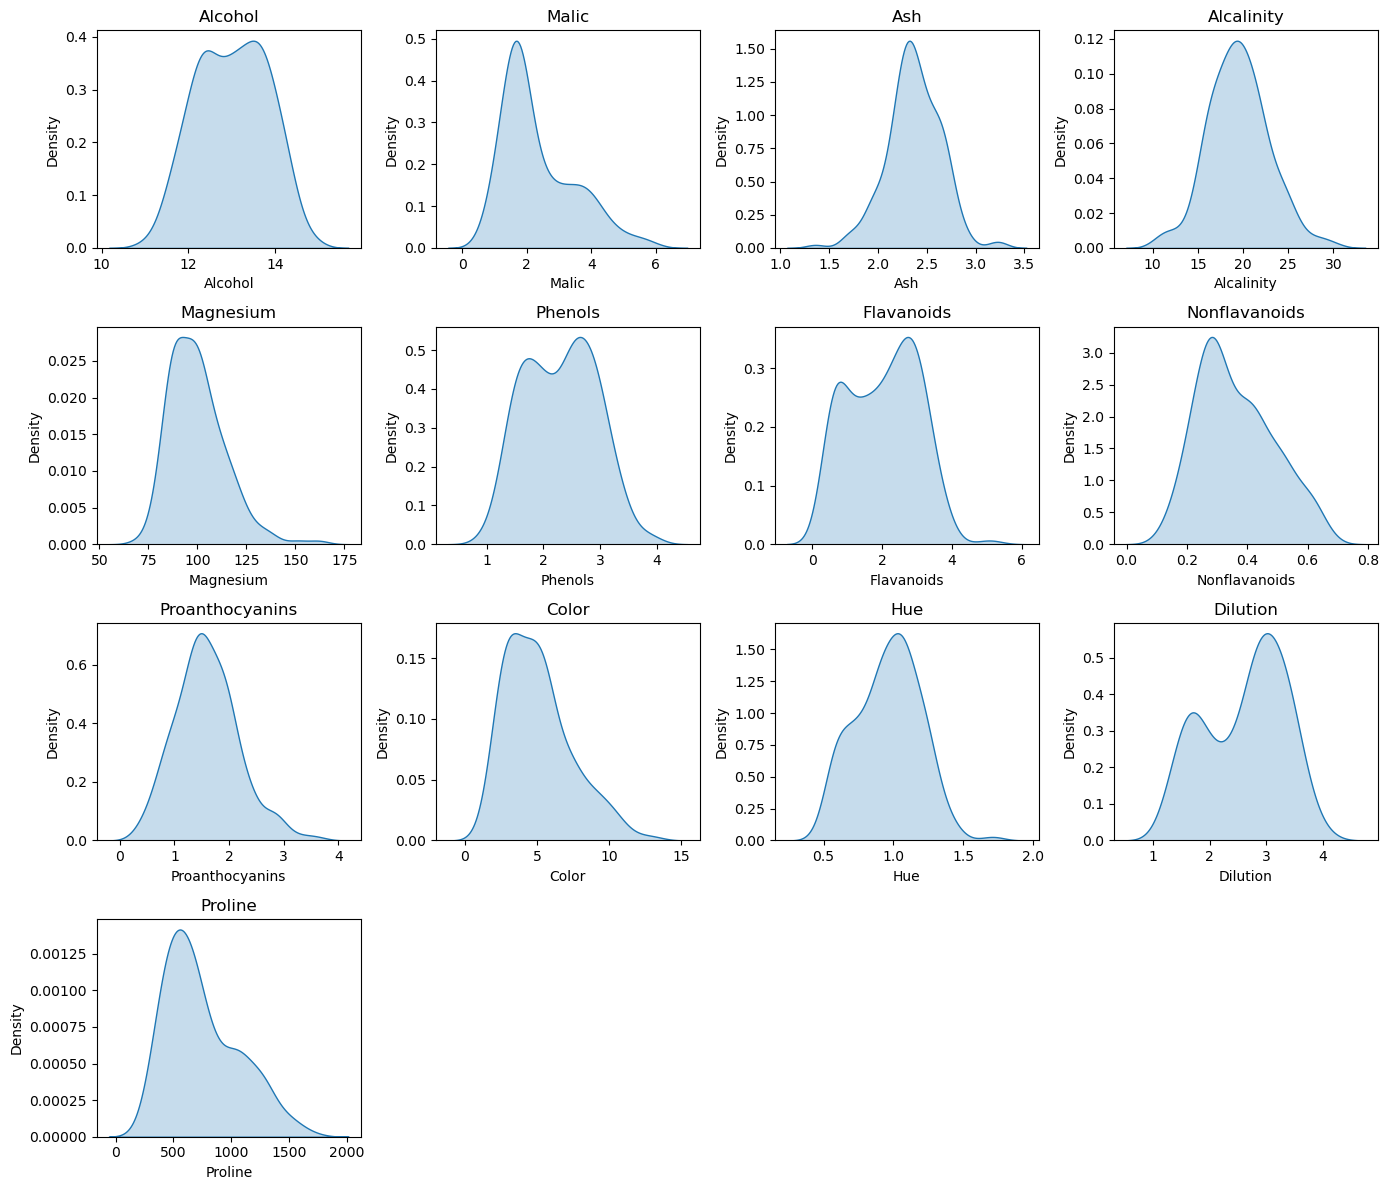

In [13]:
# Density plots
n = len(features)
cols = 4
rows = int(np.ceil(n/cols))
plt.figure(figsize=(14, 3*rows))
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(X[col], fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

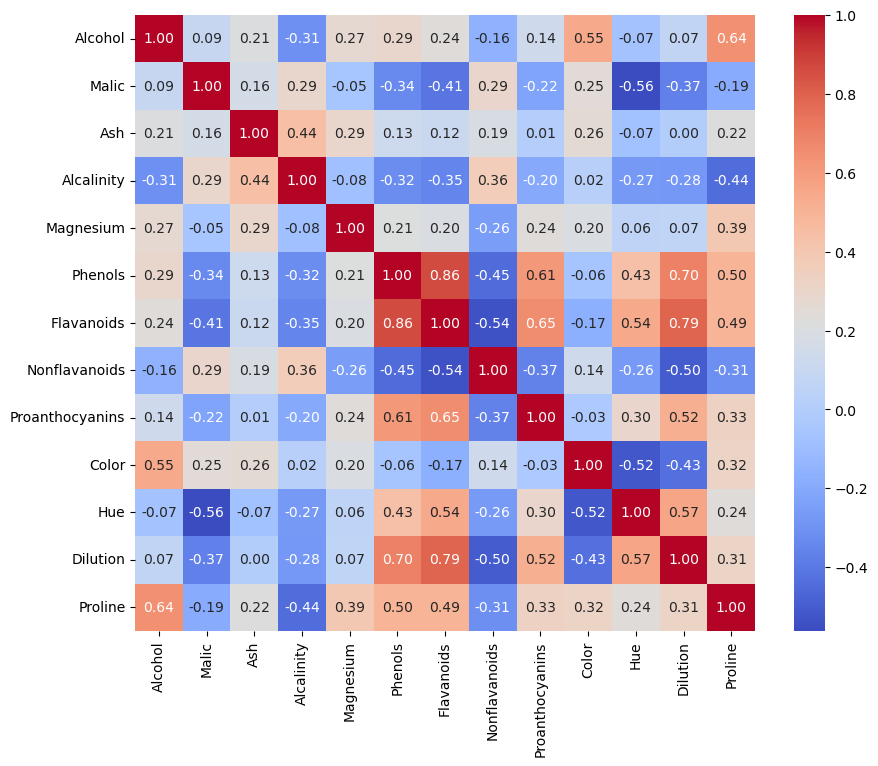

In [14]:
# Correlation heatmap
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [15]:
#PCA 
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

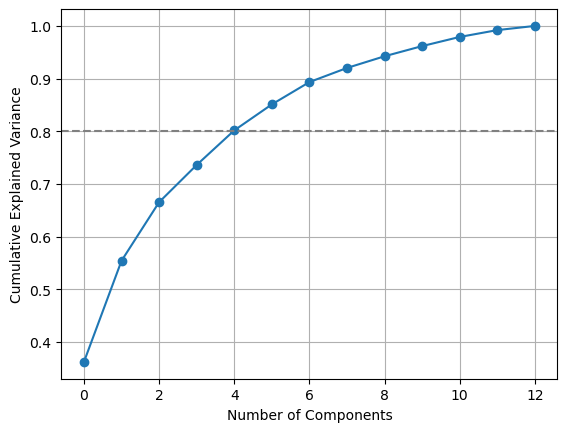

In [16]:
# Dimensionality Reduction with PCA:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(0.80, color='gray', linestyle='--', label='80% explained')
plt.grid()
plt.show()

In [17]:
#Choose number of components (>=80% variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.80) + 1
print(f"Number of components capturing >=80% variance: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Number of components capturing >=80% variance: 5


In [18]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [19]:
#PCA loadings:
loadings = pd.DataFrame(pca.components_.T, index=features,
                        columns=[f'PC{i}' for i in range(1, n_components+1)])
for pc in loadings.columns:
    top = loadings[pc].abs().sort_values(ascending=False).head(5)
    print(f"\n{pc} top features:")
    display(pd.DataFrame({pc: loadings.loc[top.index, pc]}))


PC1 top features:


,PC1
Flavanoids,0.422934
Phenols,0.394661
Dilution,0.376167
Proanthocyanins,0.313429
Nonflavanoids,-0.298533



PC2 top features:


,PC2
Color,0.529996
Alcohol,0.483652
Proline,0.364903
Ash,0.316069
Magnesium,0.299634



PC3 top features:


,PC3
Ash,0.626224
Alcalinity,0.612080
Alcohol,-0.207383
Nonflavanoids,0.170368
Dilution,0.166005



PC4 top features:


,PC4
Malic,0.536890
Hue,-0.427771
Proanthocyanins,0.399057
Magnesium,-0.351797
Proline,-0.232071



PC5 top features:


,PC5
Magnesium,0.727049
Nonflavanoids,-0.500703
Alcohol,-0.265664
Hue,-0.173615
Proline,-0.157869


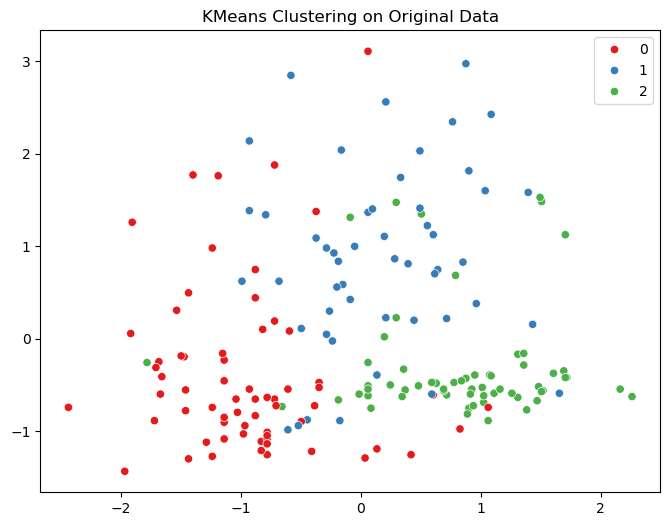

Original Clustering-Silhouette: 0.285, DBI: 1.389, ARI: 0.897


In [20]:
import warnings
warnings.filterwarnings('ignore')
# Clustering with Original Data:
kmeans = KMeans(n_clusters=3, random_state=0)
labels_orig = kmeans.fit_predict(X_scaled)
silhouette_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
ari_orig = adjusted_rand_score(y, labels_orig)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_orig, palette='Set1')
plt.title('KMeans Clustering on Original Data')
plt.show()
print(f"Original Clustering-Silhouette: {silhouette_orig:.3f}, DBI: {db_orig:.3f}, ARI: {ari_orig:.3f}")

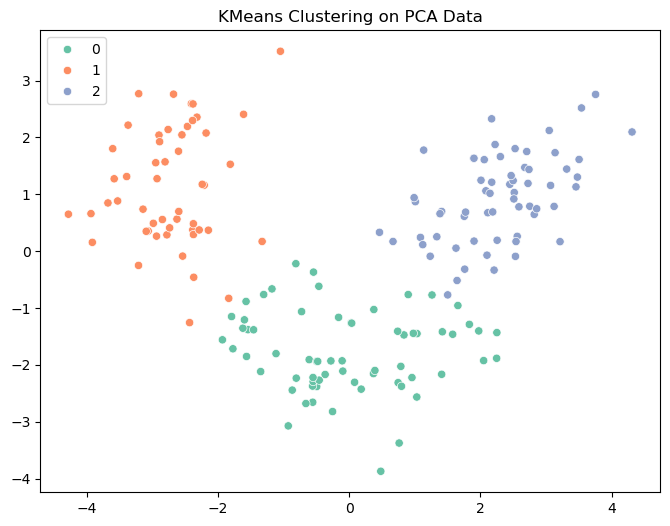

In [21]:
# Clustering with PCA Data:
kmeans_pca = KMeans(n_clusters=3, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca)
silhouette_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)
ari_pca = adjusted_rand_score(y, labels_pca)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette='Set2')
plt.title('KMeans Clustering on PCA Data')
plt.show()

In [22]:
print(f'PCA Data: Silhouette={silhouette_pca:.3f}, DBI={db_pca:.3f}, ARI={ari_pca:.3f}')

PCA Data: Silhouette=0.369, DBI=1.093, ARI=0.897


In [23]:
#Task 5: Comparison and Analysis:
print(f"\nComparison:\nOriginal Clustering-Silhouette: {silhouette_orig:.3f}, DBI: {db_orig:.3f}, ARI: {ari_orig:.3f}")
print(f"PCA Clustering - Silhouette: {silhouette_pca:.3f}, DBI: {db_pca:.3f}, ARI: {ari_pca:.3f}")


Comparison:
Original Clustering-Silhouette: 0.285, DBI: 1.389, ARI: 0.897
PCA Clustering - Silhouette: 0.369, DBI: 1.093, ARI: 0.897


In [24]:
## Conclusion and Insights
### 1. Key Findings
#The wine dataset contained 13 numerical features with 3 wine classes (Type).  
#Exploratory Data Analysis (EDA) showed variation in feature distributions, correlations, and potential outliers.  
#PCA reduced the dataset from 13 features to 7 principal components while retaining ~80% of the variance.  
##Clustering Results:  
#**Original Data** - Silhouette ≈ 0.285, DBI ≈ 1.389, ARI ≈ 0.897  
#**PCA Data** - Silhouette ≈ 0.369, DBI ≈ 1.093, ARI ≈ 0.897 
#This shows that PCA improved clustering quality slightly while reducing dimensionality.
### 2. Practical Implications
#**PCA** helps in handling high-dimensional datasets by removing noise, reducing computational cost, and enabling better visualization.  
#**KMeans Clustering** is useful for identifying hidden groups or patterns in unlabeled data.  
#Together, PCA + clustering is a powerful pipeline for unsupervised learning, especially when the dataset has many correlated features.
### 3. Recommendations
#Use **PCA before clustering** when the dataset has many features, strong correlations, or when speed/efficiency is important.  
#Use **clustering directly on original features** when interpretability of original variables is required.  
#For medium-sized datasets like wine, applying PCA first can enhance clustering performance while maintaining most of the important information.